dtype :  Unnamed: 0      int64
Gender         object
FSIQ            int64
VIQ             int64
PIQ             int64
Weight        float64
Height        float64
MRI_Count       int64
partY         float64
partY2        float64
dtype: object
Pearson's r =  0.3167169327628138
p-value =  0.04646270480311824


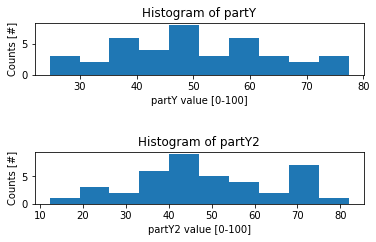

In [31]:
# myanalysis.py
import numpy as np
import pandas as pd
import random as rd
import matplotlib.pyplot as plt
import scipy.stats as sp
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

import statsmodels.api as sm
from sklearn import linear_model

# Read "brainsize.csv" from "../practical/brainsize.csv"

brainsize = pd.read_csv("brainsize.csv",delimiter=';')
N=len(brainsize)
brainsize.head(N)

# I see some data missing being marked as '.' -> Replace it by NaN
brainsize = brainsize.replace('.', np.nan)

# Conversion of some types into float
brainsize['Weight'] = brainsize['Weight'].astype(float)
brainsize['Height'] = brainsize['Height'].astype(float)

# Add a first random variable partY : partY2=np.random.normal(50,20,N)

#partY = [37.21384571554715, 58.71307834469521, 46.74835170582498, 24.710210644128686, 21.5174588110659, 26.327211882612552, 37.414220422307466, 71.5581384094793, 46.3863302672454, 57.85713505895777, 39.96199223261654, 68.33032248823035, 32.83004894004441, 21.376158725895028, 51.6190175857707, 9.336726455694482, 83.04122196306282, 33.923249926802484, 61.306394579068986, 81.93005875720668, 25.877415125996546, 45.955933970611774, 40.41726110591978, 69.05227992243758, 44.69914213081141, 87.07135004547659, 71.60124746794533, 41.162335809247494, 54.12307975007114, 21.266230662966446, 17.764114910822343, 40.680052905666074, 34.77209867424814, 33.071017173841504, 34.584264913683185, 46.07761238862511, 32.87398207956602, 19.03468183212, 79.30494781954106, 50.915801503259836]  #[rd.gauss(mu,sigma) for k in range(N)] # rd.sample(range(0,100),N)
partY=[49.16644137,37.03471765,29.22887655,61.20606395,51.96142736,58.10181611,46.7040757,50.58690401,38.74156167,39.55930919,56.93800092,32.79429376,30.85348657,77.48158731,42.65547849,49.04350322,41.89629502,50.6620056,66.57234694,35.81018935,25.60947682,72.57776781,70.91273488,56.78863838,36.19940034,74.61400111,54.49683027,65.54541445,47.70904622,61.47346262,60.57710421,24.65637482,43.12068662,63.84993811,51.41007177,47.10884122,45.42721919,49.14302235,69.89932837,36.22892975]
brainsize['partY'] = partY

# Add a second random variable partY2 : partY2=np.random.normal(50,20,N)

#partY2 = [29.074780234960535, 64.62528521506617, 16.30698194041993, 28.775640150502248, 67.08540701174124, 50.618137928322746, 43.59684240065308, 50.96682398235472, 49.872450227614415, 9.373952614144784, 67.45621102858642, 40.73597525449436, 90.94128744521538, 47.12621065897509, 57.99207832647869, 32.86407547322241, 58.69578445573781, 52.67428575874217, 66.42572632914458, 55.58225459931812, 40.9824873101613, 66.81852900135513, 50.77379498261898, 76.10160072828123, 46.06477678060415, 41.111358974088645, 52.31340680981843, 40.14200810138522, 44.67996743412676, 47.42978018767714, 28.546112369280692, 29.82963877535477, 74.45258533851873, 83.26634116925811, 32.697989231275976, 81.9941928004951, 31.54071023181283, 69.90124122945278, 58.83803284825756, 32.48159803509736]#[rd.gauss(mu,sigma) for k in range(N)] # rd.sample(range(0,100),N)
partY2=[49.95969367,27.98988465,40.6969478,66.84422947,21.89712288,46.28770742,68.7440651,50.73995944,50.94500417,29.19459461,47.09900811,45.84432981,39.34383394,19.2493662,74.01498786,59.58219786,69.18273254,38.39913085,36.91416637,33.85480659,41.78321472,70.05555154,71.81046433,12.24348989,46.54292554,64.52592382,38.68515676,46.47969269,24.71271463,40.72674837,69.5371685,82.02633955,73.30074217,36.05179964,44.31815509,59.8466495,60.3448255,54.4307475,48.2810806,50.63390224]
brainsize['partY2'] = partY2

brainsize.head(N)

# If the weight and height are known, we can compute the BMI which is known to be a good predictor for most variables
BMI = []
for k in range(N):
    if not(pd.isna(brainsize['Height'][k]) or pd.isna(brainsize['Weight'][k])):
        BMI.append((brainsize['Weight'][k]/2.2)/(pow(brainsize['Height'][k]*0.0254,2))) # Convert weight from pounds to kg and height from cm to m
    else:
        BMI.append(np.nan)

#plt.plot(BMI,partY, 'o')
#plt.plot(brainsize['Weight'],partY, 'o')
#plt.plot(brainsize['Height'],partY, 'o')
#plt.plot(brainsize['MRI_Count'],partY,'o')
#print(BMI)


plt.figure(1)
plt.subplot(2,1,1)
plt.hist(partY)
plt.xlabel("partY value [0-100]")
plt.ylabel("Counts [#]")
plt.title("Histogram of partY")
plt.subplot(2,1,2)
plt.hist(partY2)
plt.xlabel("partY2 value [0-100]")
plt.ylabel("Counts [#]")
plt.title("Histogram of partY2")
plt.tight_layout(pad=3.0)

model = np.asarray(-5.372e-05*brainsize['MRI_Count']+0.7772*brainsize['FSIQ']-0.3567*brainsize['VIQ']-0.4400*brainsize['PIQ']+99.6778)
print("dtype : ",brainsize.dtypes)

# Pearson's correlation coefficient : rho
exclude = ~np.logical_or(np.isnan(model), np.isnan(partY)) # Pearon's r doesn't behave well with NaNs
model_ = np.compress(exclude, model)  
partY_ = np.compress(exclude, partY)  
r, p = sp.stats.pearsonr(model_,partY_)
print("Pearson's r = ",r)
print("p-value = ",p)

#p = 

# Visualizations

# Outputs of the significant statistical test for partY

# Outputs of the significant statistical test for partY


In [32]:
exclude = ~np.logical_or(np.isnan(model), np.isnan(partY)) # Pearon's r doesn't behave well with NaNs
model_ = np.compress(exclude, model)  
partY_ = np.compress(exclude, partY2)  
r, p = sp.stats.pearsonr(model_,partY_)
print("PartY2 : Pearson's r = ",r)
print("PartY2 : p-value = ",p)

PartY2 : Pearson's r =  0.01506335253869396
PartY2 : p-value =  0.9264969009397449


In [ ]:
brainsize[["FSIQ","VIQ","PIQ","MRI_Count"]]

"""import statsmodels.api as sm #python -m pip install statsmodels
model = sm.OLS(partY, np.asarray(brainsize)).fit()
predictions = model.predict(np.asarray(brainsize))
model.summary()
"""

from sklearn.linear_model import LinearRegression
X = np.asarray(brainsize[["FSIQ","VIQ","PIQ","MRI_Count"]])
y = partY
reg = LinearRegression().fit(X, y)
reg.score(X, y)
reg.coef_
reg.intercept_

import statsmodels.api as sm #python -m pip install statsmodels
mod = sm.OLS(y,X)
fii = mod.fit()
p_values = fii.summary2().tables[1]['P>|t|']
print(p_values)

In [ ]:
brainsize[["FSIQ","VIQ","PIQ","MRI_Count"]]

"""import statsmodels.api as sm #python -m pip install statsmodels
model = sm.OLS(partY, np.asarray(brainsize)).fit()
predictions = model.predict(np.asarray(brainsize))
model.summary()
"""

from sklearn.linear_model import LinearRegression
X = np.asarray(brainsize[["FSIQ","VIQ","PIQ","MRI_Count"]])
y = partY
reg = LinearRegression().fit(X, y)
reg.score(X, y)
reg.coef_
reg.intercept_

import statsmodels.api as sm #python -m pip install statsmodels
mod = sm.OLS(y,X)
fii = mod.fit()
p_values = fii.summary2().tables[1]['P>|t|']
print(p_values)

def sub_lists(list1): 
  
    # store all the sublists  
    sublist = [[]] 
      
    # first loop  
    for i in range(len(list1) + 1): 
          
        # second loop  
        for j in range(i + 1, len(list1) + 1): 
              
            # slice the subarray  
            sub = list1[i:j] 
            sublist.append(sub) 
              
      
    return sublist 

for N in range(0,len(brainsize[["FSIQ","VIQ","PIQ","MRI_Count"]])):
    indexes=sub_lists([k for k in range(0,1)])

In [ ]:
"""from itertools import combinations
def sub_lists(my_list):
    subs = []
    for i in range(0, len(my_list)+1):
        temp = [list(x) for x in combinations(my_list, i)]
        if len(temp)>0:
            subs.extend(temp)
    subs.pop(0)
    return subs

from sklearn.linear_model import LinearRegression
import statsmodels.api as sm #python -m pip install statsmodels

X = np.asarray(brainsize[["FSIQ","VIQ","PIQ","MRI_Count"]])
y = np.asarray(partY)
p_values_list=[]
for N in range(0,len(X)):
    sublist_N=sub_lists([k for k in range(0,N)])
    for index_list in sublist_N:
        X_sublist=X[index_list]
        y_sublist=y[index_list]
        reg = LinearRegression().fit(X_sublist, y_sublist)
        reg.score(X_sublist, y_sublist)
        reg.coef_
        reg.intercept_
        mod = sm.OLS(y_sublist,X_sublist)
        fii = mod.fit()
        p_values = fii.summary2().tables[1]['P>|t|']
        print(p_values)
"""

In [30]:
# Tutorial : https://www.machinelearningplus.com/statistics/p-value/

# Load Packages
import pandas as pd
import statsmodels.formula.api as smf

# Import
df = brainsize
df.head()

# Train model
model = smf.ols('partY ~ MRI_Count + FSIQ + VIQ + PIQ', data=df).fit()

# Results
print(model.summary())
# P-Values
print(model.pvalues)

                            OLS Regression Results                            
Dep. Variable:                  partY   R-squared:                       0.100
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.9756
Date:                Wed, 27 May 2020   Prob (F-statistic):              0.433
Time:                        13:41:35   Log-Likelihood:                -159.32
No. Observations:                  40   AIC:                             328.6
Df Residuals:                      35   BIC:                             337.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     99.6778     28.343      3.517      0.0